In [19]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_df = pd.merge(ride_df,city_df,on="city",how="left")
city_ride_df["type"].unique()




array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [20]:
# Display the data table for preview
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

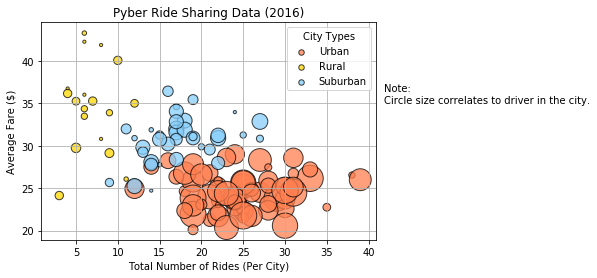

In [29]:
# Obtain the x and y coordinates for each of the three city types
city_type_urban = city_ride_df.loc[city_ride_df["type"] == 'Urban',:].groupby("city")
city_type_rural = city_ride_df.loc[city_ride_df["type"] == 'Rural',:].groupby("city")
city_type_suburban = city_ride_df.loc[city_ride_df["type"] == 'Suburban',:].groupby("city")

city_type_urban_x = city_type_urban["ride_id"].count()
city_type_urban_y = city_type_urban["fare"].mean()
city_type_urban_s = city_type_urban["driver_count"].max()

city_type_rural_x = city_type_rural["ride_id"].count()
city_type_rural_y = city_type_rural["fare"].mean()
city_type_rural_s = city_type_rural["driver_count"].max()

city_type_suburban_x = city_type_suburban["ride_id"].count()
city_type_suburban_y = city_type_suburban["fare"].mean()
city_type_suburban_s = city_type_suburban["driver_count"].max()

# Build the scatter plots for each city types
plt.scatter(x=city_type_urban_x,y=city_type_urban_y,label="Urban",
            s=city_type_urban_s*10,facecolor="coral",edgecolor="black",alpha=.75)
plt.scatter(x=city_type_rural_x,y=city_type_rural_y,label="Rural",
            s=city_type_rural_s*10,facecolor="gold",edgecolor="black",alpha=0.75)
plt.scatter(x=city_type_suburban_x,y=city_type_suburban_y,label="Suburban",
            s=city_type_suburban_s*10,facecolor="lightskyblue",edgecolor="black",alpha=0.75)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
lgnd = plt.legend(title="City Types",loc="best",scatterpoints=1)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plttext = "Note:\nCircle size correlates to driver in the city."
plt.text(.92, 0.6, plttext, fontsize=10, transform=plt.gcf().transFigure)

# Save Figure
plt.savefig("RideSharingData_bubble.png")

# Show plot
plt.show()

In [27]:
# Show plot
plt.show()

## Total Fares by City Type

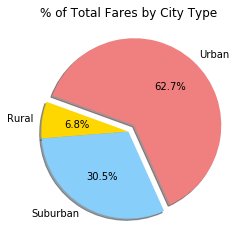

In [28]:
# Calculate Type Percents
colors = ["gold", "lightskyblue", "lightcoral"]
city_ride_type_group = city_ride_df.groupby("type")
type_fare_perc = city_ride_type_group["fare"].sum()
ride_type = type_fare_perc.keys()

# Build Pie Chart
plt.pie(type_fare_perc, explode=[0,0,0.1], labels=ride_type, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("FaresByCityType_Pie.png")

# Show Figure
plt.show()

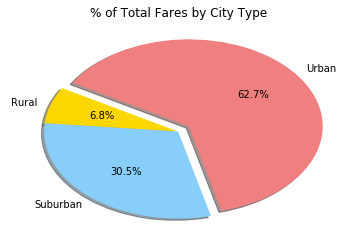

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

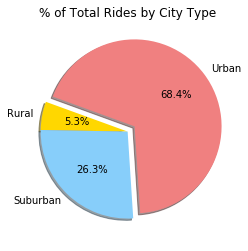

In [30]:
# Calculate Ride Percents
ride_perc = city_ride_type_group["ride_id"].count()

# Build Pie Chart
plt.pie(ride_perc, explode=[0,0,0.1], labels=ride_type, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("RidesByCityType_Pie.png")

# Show Figure
plt.show()


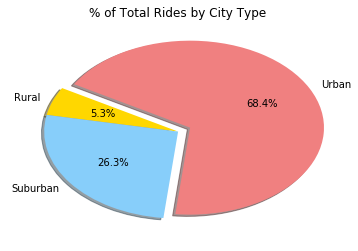

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

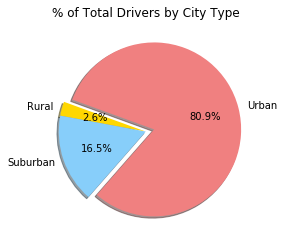

In [31]:
# Calculate Driver Percents
type_city_group = city_ride_df.groupby(["type","city"])
drivers_in_each_city = type_city_group["driver_count"].max()
type_city = drivers_in_each_city.groupby("type")
driver_type_city = type_city.sum()

# Build Pie Charts
plt.pie(driver_type_city, explode=[0,0,0.1], labels=ride_type, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("DriversByCityType_Pie.png")

# Show Figure
plt.show()



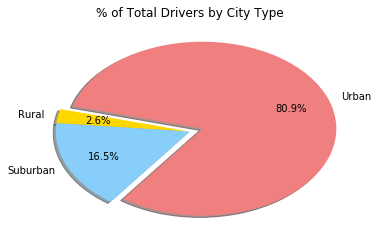

In [6]:
# Show Figure
plt.show()